<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/KhaledElTahan/DeepLearning/blob/master/Labs/lab1/lab1_part1.ipynb">
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Copyright Information

**Parts of this lab are based on Kaggle kernels.**

# Lab 1 - Part1: Linear Regression

![Linear Regression](https://raw.githubusercontent.com/KhaledElTahan/AUC-DeepLearning/master/Labs/lab1/linear_regression.png)

## 1.1.1 Problem Statement

The problem we are trying to solve here is finding a new house which is suitable to our needs and the budget we assigned. The client who wants to buy the new house did her research and found some houses. She wrote the details of each house she visited including location, sale condition, sale type, house price, among others. She needs some help to know how much she is expected to pay to get a house that conforms with her specific needs.

Your task is to build a linear regression model that helps her to predict the house price depending on the given attributes she collected.

## 1.1.2 Problem Details

Let's dive into the code, explain it and show you the parts you need to fill!

### 1.1.2.1 Import Needed packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 1.1.2.2 Configure Notebook

In [3]:
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

### 1.1.2.3 Work on the Dataset

This dataset contains 80 features that demonstrate the state of the house and our target which is the house price.

We begin by loading the train and test splits of the dataset using pandas.

In [4]:
train = pd.read_csv("https://raw.githubusercontent.com/KhaledElTahan/DeepLearning/master/Labs/lab1/lab1_housing_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/KhaledElTahan/DeepLearning/master/Labs/lab1/lab1_housing_test.csv")

You can have a look at the train split of the dataset using the head command. I very much encourage you to have a deeper look on the dataset file.

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data preprocessing:
* First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal
* Create Dummy variables for the categorical features
* Replace the numeric missing values (NaN's) with the mean of their respective columns



In [6]:
# Concatenate all the data
# We do this to be able to preprocess on the whole dataset
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

# Log transform the target y in training data - by reference inside all
train["SalePrice"] = np.log1p(train["SalePrice"])

# Log transform skewed numeric features:

# Get Numerical Fields
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index 

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewnessc
skewed_feats = skewed_feats[skewed_feats > 0.75] # Get Skewed Columns
skewed_feats = skewed_feats.index # Get Skewed Columns indices

# Log scale skewed columns
# Normalize the skewed distribution for better regression
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

# Create Dummy variables for the categorical features 
all_data = pd.get_dummies(all_data) 

# Replace the numeric missing values (NaN's) with the mean of their respective columns
all_data = all_data.fillna(all_data.mean())

# Split the data to training & testing
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

# Standardize features by removing the mean and scaling to unit variance
# z = (x - u) / s
X_train = StandardScaler().fit_transform(X_train)

#split training data into training & validation, default splitting is 25% validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state = 3)

### 1.1.2.4 Define your model here (TODO)

One important note you need to be aware of, linear regression is a neural network with only one perceptron (i.e. dense layer with one node) with a linear activation (i.e. no activation function). 

![One Perceptron Neural Network](https://raw.githubusercontent.com/KhaledElTahan/AUC-DeepLearning/master/Labs/lab1/perceptron.png)

Use this note to define a **sequential model of one dense layer with one unit using Tensorflow.Keras**.

In [66]:
from tensorflow.keras import regularizers
model = Sequential()# TODO: Define the Model using Tensorflow.Keras
model.add(Dense(units=1, activation="linear", input_shape=(X_tr.shape[1],), kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1), name="dense_layer"))

### 1.1.2.5 Compile your model and print a summary

In [67]:
model.compile(loss = "mean_squared_error", optimizer = "Adam")
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 1)                 289       
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


### 1.1.2.6 Train your model

Fit your model into the training data, use the validation data to be able to plot the loss decrement during the training. 

In [68]:
hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val), epochs = 500)

Epoch 1/500
35/35 [==============================] - 1s 7ms/step - loss: 147.5517 - val_loss: 145.3256
Epoch 2/500
35/35 [==============================] - 0s 3ms/step - loss: 145.7129 - val_loss: 146.1966
Epoch 3/500
35/35 [==============================] - 0s 3ms/step - loss: 143.1315 - val_loss: 147.2393
Epoch 4/500
35/35 [==============================] - 0s 3ms/step - loss: 143.1175 - val_loss: 148.3430
Epoch 5/500
35/35 [==============================] - 0s 3ms/step - loss: 140.3054 - val_loss: 149.5427
Epoch 6/500
35/35 [==============================] - 0s 3ms/step - loss: 139.8813 - val_loss: 150.8998
Epoch 7/500
35/35 [==============================] - 0s 3ms/step - loss: 139.5602 - val_loss: 152.2088
Epoch 8/500
35/35 [==============================] - 0s 3ms/step - loss: 136.9060 - val_loss: 153.6912
Epoch 9/500
35/35 [==============================] - 0s 2ms/step - loss: 135.9796 - val_loss: 155.3300
Epoch 10/500
35/35 [==============================] - 0s 3ms/step - loss:

And this is how you can predict an output for any number of inputs.

In [69]:
print(model.predict(X_test))

[[13.606681]
 [10.274085]
 [13.147632]
 ...
 [13.514136]
 [ 8.284461]
 [14.415038]]


### 1.1.2.7 Visualize Results

It's time to see how your model's progress during the training, If all is good, you will find the validation loss decreasing without neither overfitting nor underfitting.

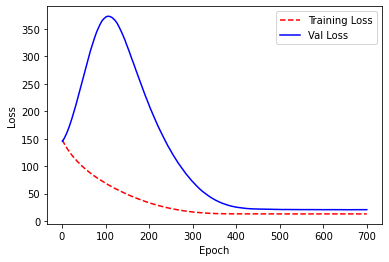

In [60]:
# Get training and test loss histories
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## 1.1.3 Conclusion:

That's it! Congratulations on training a linear regression model. 

Make sure you finish the second part of the assignment and deliver all the requirements for the submission.

